# CHARGEMENT DES PACKEGES

In [1497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [1498]:
# importation de WARNING
import warnings
warnings.filterwarnings("ignore")

# CHARGEMENT DES DONNEES

In [1499]:
data = pd.read_csv("../BISIMWA_M_Destin_pro_IA/LoanApprovalPrediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# ANALYSE DES DONNEES

In [1500]:
# Détail du dataset(598 lignes et 13 colones)
data.shape

(598, 13)

In [1501]:
# Les noms des colones dont dispose le dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1502]:
# ça donne les informations générales sur le dataset et détermine le type de données pour chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [1503]:
# Pour identifier les colonnes ayant des valeurs vides et cobien des vides pour chaque colonne
# Dans notre dataset y pas des colonnes possedant des valeurs vides
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

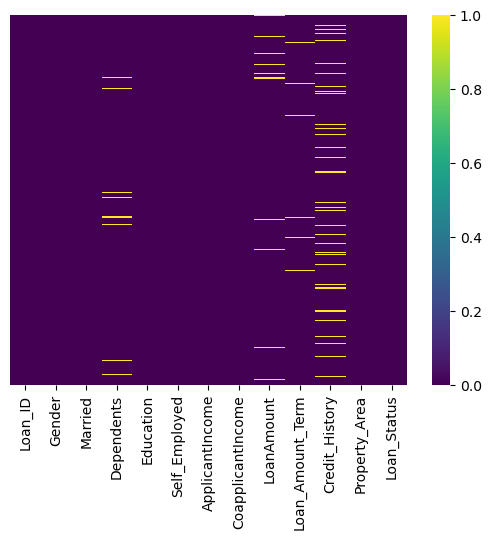

In [1504]:
# CA PRESENTE JUSTE DES COULEURS PCK Y A PAS DES COLONNES VIDES DANS LE DATASET
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

# PRE-TRAITEMENT DES DONNEES

In [1505]:
# SUPPRESSION DE LA COLONNE    Property_Area CAR ELLE N'A PAS VRMNT DE L'IMPACT DANS L'OCTOIE DE CREDIT
data = data.drop('Loan_ID', axis=1)
data = data.drop('Property_Area', axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Y


In [1506]:
# Ici c'est pour mapper les données catégorielles en données numeriques
# Par exemple MALE=1 et FEMALE=2
#             MARRIED=1 ET NO MARRIED=0
data['Gender']=np.where(data['Gender']=='Male',1,0)
data['Married']=np.where(data['Married']=='Yes',1,0)
data['Education']=np.where(data['Education']=='Graduate',1,0)
data['Self_Employed']=np.where(data['Self_Employed']=='Yes',1,0)
data['Loan_Status']=np.where(data['Loan_Status']=='Y',1,0)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0.0,1,0,5849,0.0,NaN,360.0,1.0,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,1
594,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,1
595,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1
596,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1


In [1507]:
# Ici c'est pour imputer les valeurs à certaines colonnes ayant des vaeurs manquantes
# Nous, ns avons opté pour la moyenne(mean), mais on peut aussi utiliser la mediane
# Alors on prend le ligne et colonne et on calcul la moyenne et c'est cette moyenne qu'on va imputer partout où il ya vide sur une klconque colonne
# NB: chaque colonne aura sa propre moyenne selon ses données et le calcul faite 
data['Dependents'].fillna(data['Dependents'].mean(),inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0.0,1,0,5849,0.0,144.968804,360.0,1.0,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1
594,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1
595,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,1
596,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,1


In [1508]:
# Ici on passe à la vérification pour voir si toutes les valeurs manquantes ont été imputer
# Comme il ya 0 c'est-à-dire que pas plus des valeurs manquantes dans toutes les colonnes
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

<Axes: >

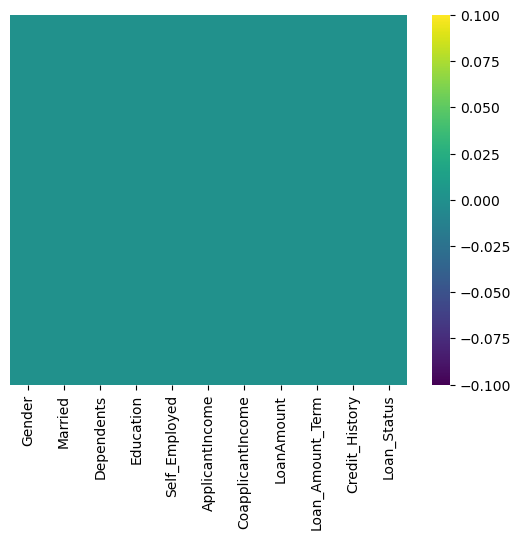

In [1509]:
# CA PRESENTE JUSTE DES COULEURS PCK Y A PAS DES COLONNES VIDES DANS LE DATASET
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [1510]:
colonne_critere = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                        'Loan_Amount_Term', 'Credit_History', 'Loan_Status']]
colonne_critere

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0.0,1,0,5849,0.0,144.968804,360.0,1.0,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1
594,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1
595,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,1
596,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,1


In [1511]:
col_encoded = LabelEncoder()
list_object = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                        'Loan_Amount_Term', 'Credit_History', 'Loan_Status']
for encoded in list_object:
    colonne_critere[encoded] = col_encoded.fit_transform(colonne_critere[encoded])

In [1512]:
colonne_critere

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,1,0,368,0,98,9,2,1
1,1,1,2,1,0,299,60,81,9,2,0
2,1,1,0,1,1,136,0,26,9,2,1
3,1,1,0,0,0,88,158,73,9,2,1
4,1,0,0,1,0,373,0,94,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,1,0,122,0,29,9,2,1
594,1,1,4,1,0,268,0,7,5,2,1
595,1,1,2,1,0,423,3,162,9,2,1
596,1,1,3,1,0,414,0,132,9,2,1


<Axes: >

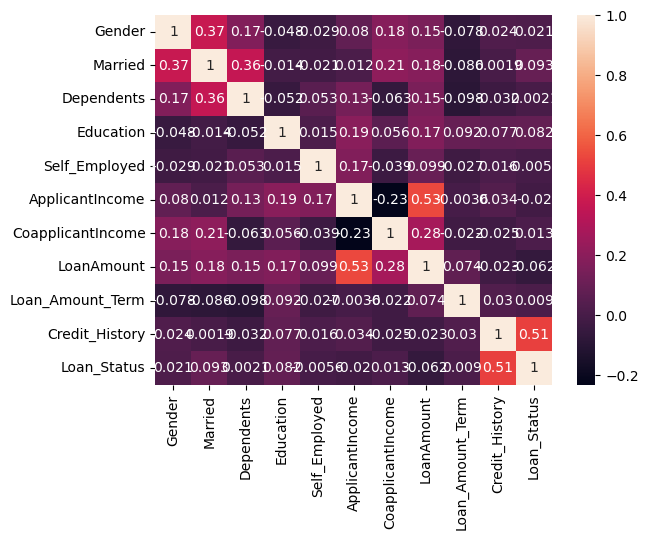

In [1513]:
sns.heatmap(colonne_critere.corr(), annot=True)

# DIVISION DES DONNEES EN VIARABLES(indépendantes et dépendantes)

In [1514]:
from sklearn.model_selection import train_test_split
#X = data.drop(['Loan_Status'], axis = 1)
X = colonne_critere.iloc[:,:-1]
y = colonne_critere.iloc[:,-1]

# DIVISION DES DONNEES: Train et Test

In [1515]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train:", X_train.shape )
print("X_test:", X_test.shape )
print("Y_train:", y_train.shape )
print("Y_test:", y_test.shape )

X_train: (418, 10)
X_test: (180, 10)
Y_train: (418,)
Y_test: (180,)


# STANDARDISATION DES DONNEES(Variables independantes)

In [1516]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)

In [1517]:
X_train

array([[ 0.43690181,  0.73650216,  2.03459442, ..., -0.19021982,
         0.34255587, -2.24350366],
       [ 0.43690181,  0.73650216, -0.76297291, ..., -0.88007943,
        -2.46505888, -2.24350366],
       [ 0.43690181,  0.73650216,  1.33520259, ..., -0.10120567,
         0.34255587, -2.24350366],
       ...,
       [ 0.43690181,  0.73650216,  2.03459442, ..., -0.81331882,
        -0.35934782, -2.24350366],
       [ 0.43690181,  0.73650216,  0.63581076, ...,  0.18809029,
        -2.46505888,  0.51468613],
       [ 0.43690181, -1.35776928, -0.76297291, ...,  0.98921758,
         0.34255587,  0.51468613]])

In [1518]:
X_test

array([[ 0.56879646,  0.73379939,  1.11437459, ..., -1.58682247,
        -1.14547031, -0.8959528 ],
       [ 0.56879646,  0.73379939,  1.11437459, ..., -0.10548891,
         0.32203614,  0.5064081 ],
       [ 0.56879646,  0.73379939, -0.93942158, ...,  0.14140002,
         0.32203614, -2.29831369],
       ...,
       [-1.75809815, -1.36277029, -0.93942158, ..., -0.89104458,
         0.32203614, -2.29831369],
       [ 0.56879646,  0.73379939,  1.11437459, ...,  0.25362226,
         0.32203614,  0.5064081 ],
       [ 0.56879646,  0.73379939,  0.42977587, ...,  0.45562229,
         0.32203614,  0.5064081 ]])

# CONSTRUCTION DU DEEP LEARNING

In [1519]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [1520]:
model_dnn = Sequential()

In [1521]:
# AJOUT DE LA 1ère COUCHE
model_dnn.add(Dense(10, input_shape=(10,), activation='relu'))

# AJOUT DE INTERMEDIAIRE 1
model_dnn.add(Dense(20, activation='relu'))

# AJOUT DE INTERMEDIAIRE 2
model_dnn.add(Dense(10, activation='relu'))
model_dnn.add(Dropout(0.5))

# AJOUT DE INTERMEDIAIRE 3
model_dnn.add(Dense(20, activation='relu'))


# COUCHE DE SORTIE
model_dnn.add(Dense(1, activation='sigmoid'))


model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 10)                110       
                                                                 
 dense_167 (Dense)           (None, 20)                220       
                                                                 
 dense_168 (Dense)           (None, 10)                210       
                                                                 
 dropout_33 (Dropout)        (None, 10)                0         
                                                                 
 dense_169 (Dense)           (None, 20)                220       
                                                                 
 dense_170 (Dense)           (None, 1)                 21        
                                                                 
Total params: 781
Trainable params: 781
Non-trainable

In [1522]:
history = model_dnn.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 1s 23ms/step - loss: 0.7020 - accuracy: 0.4641 - val_loss: 0.6959 - val_accuracy: 0.4722
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6870 - accuracy: 0.5933 - val_loss: 0.6788 - val_accuracy: 0.6444
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6740 - accuracy: 0.7033 - val_loss: 0.6660 - val_accuracy: 0.7722
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6617 - accuracy: 0.7081 - val_loss: 0.6560 - val_accuracy: 0.7333
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.7105 - val_loss: 0.6465 - val_accuracy: 0.7167
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6435 - accuracy: 0.7105 - val_loss: 0.6371 - val_accuracy: 0.7333
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.6353 - accuracy: 0.7225 - val_loss: 0.6266 - val_accuracy: 0.7389
Epoch 8/1

# EVALUATION DU MODEL DU DEEP LEARNING

In [1523]:
model_dnn.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.8111


[0.4848044216632843, 0.8111110925674438]

In [1524]:
resultats = model_dnn.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.8111


In [1525]:
print("Loss:", resultats[0])
print("Accuracy:", resultats[1])

Loss: 0.4848044216632843
Accuracy: 0.8111110925674438


In [1526]:
# VISUALISATION DE L'EVOLUTION DE L'ENTRAINEMENT DU Rx DE NEURONE
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']


epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

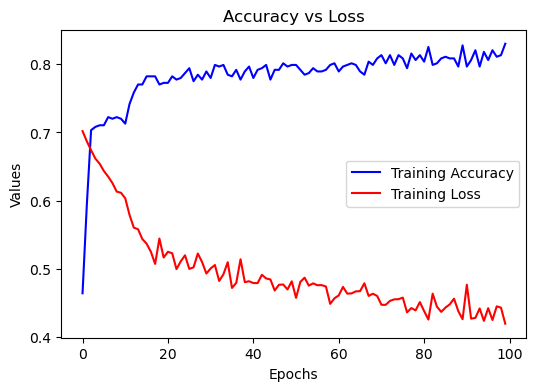

In [1527]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color = 'blue', label = 'Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color = 'red', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()


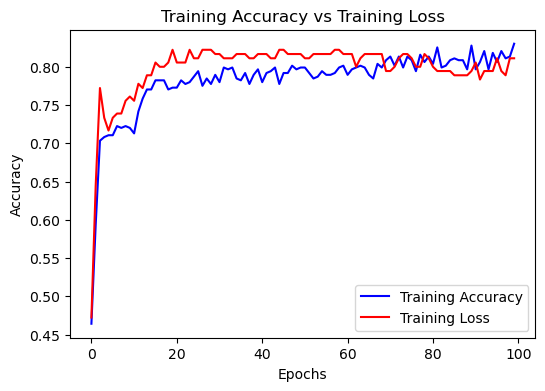

In [1528]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color = 'blue', label = 'Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color = 'red', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Training Loss')
plt.legend()
plt.show()

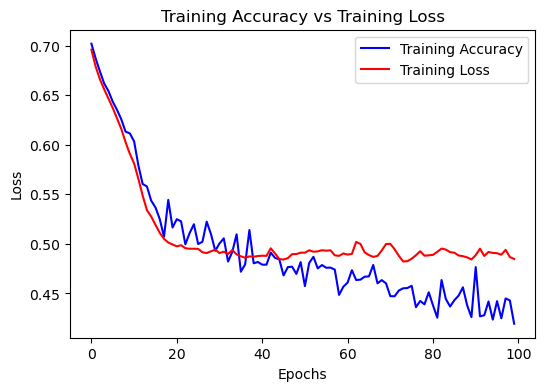

In [1529]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color = 'blue', label = 'Training Accuracy')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color = 'red', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy vs Training Loss')
plt.legend()
plt.show()

# FAIRE UNE SIMPLE PREDICTION

In [1534]:
#y_predict_model_dnn = model_dnn.predict(X_test)
#y_predict_model_dnn

y_predict_model_dnn = np.array([[0,	1,	0,	0,	1,	0,	368,	0,	98,	9,	2]])
y_predict_model_dnn

array([[  0,   1,   0,   0,   1,   0, 368,   0,  98,   9,   2]])

# SAUVEGARDE DU MODELE DU DEEP LEARNING